In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

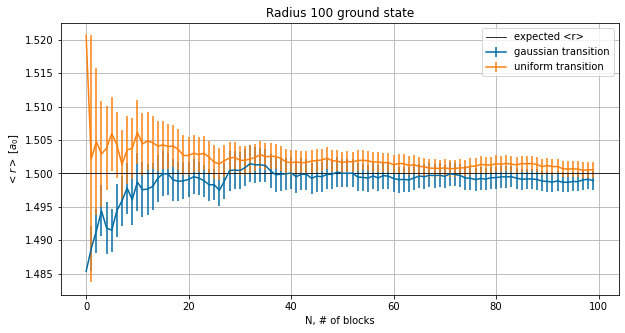

Gaussian transition | Error on the last block:  0.00143904
Uniform transition | Error on the last block:  0.00115526


In [2]:
r_gaus, er_gaus = np.loadtxt("build/results.gaussian.ground.origin.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("build/results.uniform.ground.origin.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(1.5, 0, 100, color='k',linewidth=0.8,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel("$<r>\ [a_0]$" )
plt.title ("Radius 100 ground state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

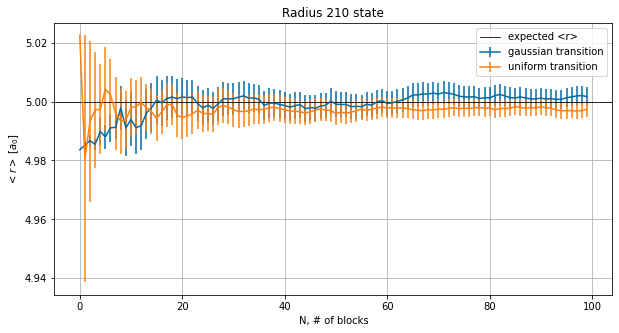

Gaussian transition | Error on the last block:  0.00319887
Uniform transition | Error on the last block:  0.00259809


In [3]:
r_gaus, er_gaus = np.loadtxt("build/results.gaussian.first-excited.origin.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("build/results.uniform.first-excited.origin.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(5, 0, 100, color='k',linewidth=0.8,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel('$<r>\ [a_0]$' )
plt.title ("Radius 210 state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

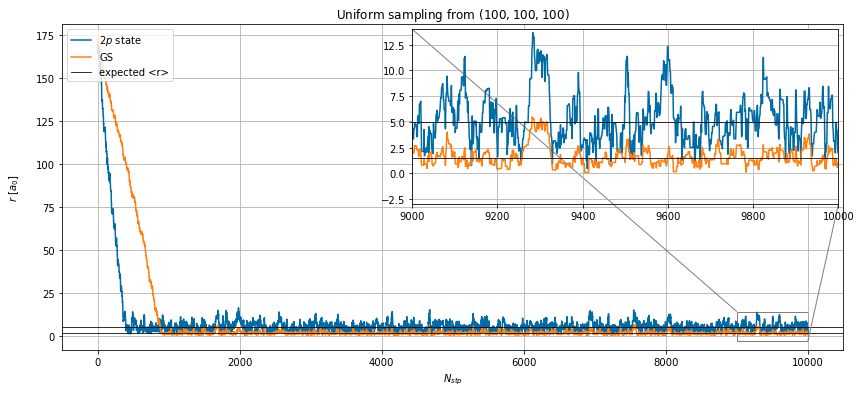

In [4]:
burnGS=np.genfromtxt('build/results.uniform.ground.far.dat',names='x,r')
burn210=np.genfromtxt('build/results.uniform.first-excited.far.dat',names='x,r')

fig, ax=plt.subplots(figsize=(14, 6))

plt.plot(burn210['x'],burn210['r'],label='$2p$ state')
plt.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
plt.legend(loc='best')
plt.xlabel('$N_{stp}$')
plt.ylabel('$r\ [a_0]$',labelpad=15)
plt.title('Uniform sampling from $(100,100,100)$', size='large')
plt.legend(loc='upper left')
plt.grid(True)

axins = zoomed_inset_axes(ax, 6)
axins.plot(burn210['x'],burn210['r'],label='$2p$ state')
axins.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
axins.set_xlim(9000,10000)
axins.set_ylim(-3, 14)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(True)
plt.show()

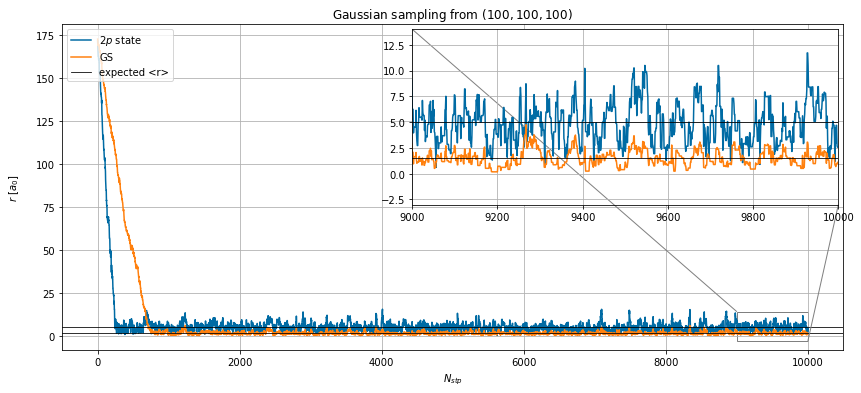

In [5]:
burnGS=np.genfromtxt('build/results.gaussian.ground.far.dat',names='x,r')
burn210=np.genfromtxt('build/results.gaussian.first-excited.far.dat',names='x,r')

fig, ax=plt.subplots(figsize=(14, 6))

plt.plot(burn210['x'],burn210['r'],label='$2p$ state')
plt.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
plt.legend(loc='best')
plt.xlabel('$N_{stp}$')
plt.ylabel('$r\ [a_0]$',labelpad=15)
plt.title('Gaussian sampling from $(100,100,100)$', size='large')
plt.legend(loc='upper left')
plt.grid(True)

axins = zoomed_inset_axes(ax, 6)
axins.plot(burn210['x'],burn210['r'],label='$2p$ state')
axins.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
axins.set_xlim(9000,10000)
axins.set_ylim(-3, 14)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(True)
plt.show()

In [6]:
title=('Ground State','$2p$ State')

def fig3D(if_far,transition_type,state):
    if if_far: state+="_far"
    pos=np.genfromtxt('build/positions.'+transition_type+'.'+state+'.dat',delimiter=' ',names='x,y,z')

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(pos['x'], pos['y'], pos['z'], c=pos['z'], marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(1, 30)
    if (state=="ground") or (state=="ground_far"): plt.title(title[0])
    elif (state=="first-excited") or (state=="first-excited_far"): plt.title(title[1])
    plt.show()

<ipython-input-6-d79e8f88796a>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


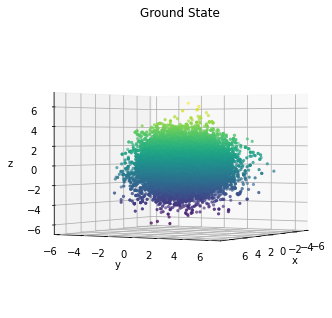

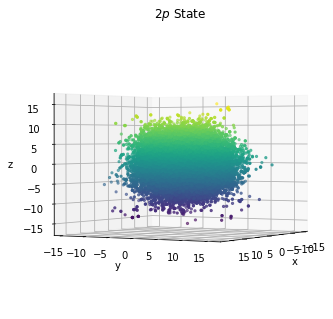

In [7]:
fig3D(False,"uniform","ground")
fig3D(False,"uniform","first-excited")

<ipython-input-6-d79e8f88796a>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


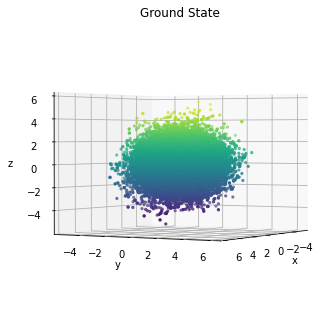

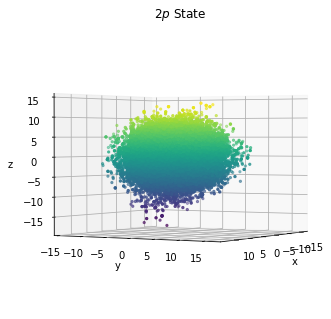

In [8]:
fig3D(False,"gaussian","ground")
fig3D(False,"gaussian","first-excited")